<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep1-2/EjercicioSep2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 2 de Septiembre**



1.   Explorar los datos, realiza gráficas del costo de las casas como función de cada característica.
2.   Ajustar un modelo lineal usando todas las características, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.

1.   Normaliza las características y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.
2.   Usa el modelo obtenido para predecir el valor de una casa con las siguientes características : tamaño=1200, num. habitaciones=3, pisos=1, años=4








In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importamos nuestro dataset desde Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Leemos el dataset
houses = np.loadtxt("/content/drive/MyDrive/Data/houses.txt",delimiter=',').T
Xh = houses[0:4] # Caracteristicas de las casas
th = houses[-1]  # Costo de la casa
labels = ["Tamaño","# de habitaciones","Pisos","Años"]

file ="/content/drive/MyDrive/Data/houses.txt"
data = np.loadtxt(file,delimiter=",").T
t = data[4]

# Normalizamos de forma estandar
datax_mu = np.mean(Xh)
datax_sigma = np.std(Xh)
Xnorm = (Xh-datax_mu)/(datax_sigma)

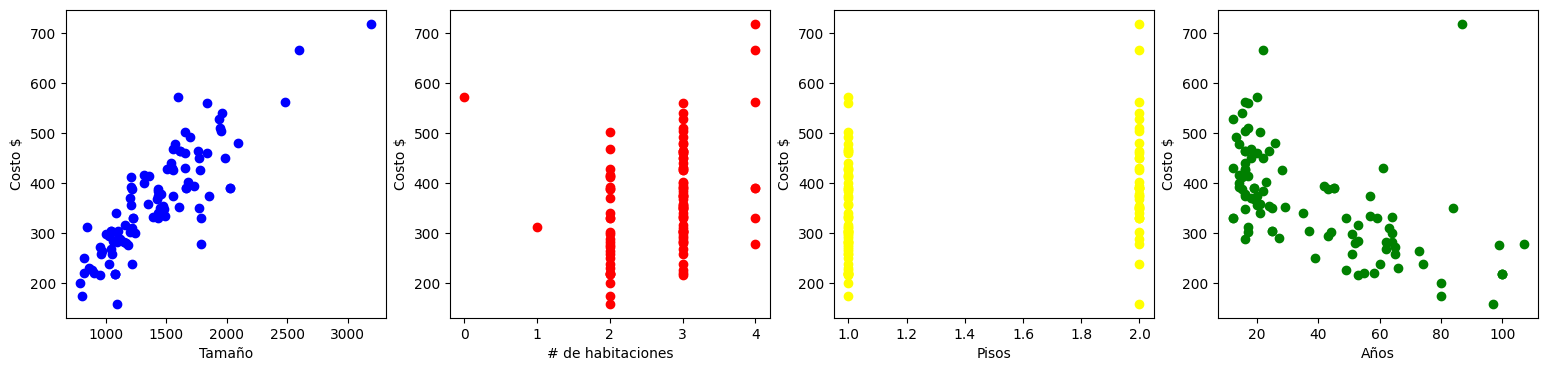

In [17]:
# Realizamos graficas del costo de las casas como funcion de cada caracteristica
plt.figure(figsize=(19,4))

# Tamaño vs Costo
plt.subplot(1,4,1)
plt.scatter(Xh[0],th,color='blue')
plt.xlabel('Tamaño')
plt.ylabel('Costo $')

# No. de Habitaciones vs Costo
plt.subplot(1,4,2)
plt.scatter(Xh[1],th,color='red')
plt.xlabel('# de habitaciones')
plt.ylabel('Costo $')

# Pisos vs Costo
plt.subplot(1,4,3)
plt.scatter(Xh[2],th,color='yellow')
plt.xlabel('Pisos')
plt.ylabel('Costo $')

# Años vs Costo
plt.subplot(1,4,4)
plt.scatter(Xh[3],th,color='green')
plt.xlabel('Años')
plt.ylabel('Costo $')

plt.show()

In [31]:
# Funcion que calcula las derivadas
def dL(x, t, w):

  N = 1/len(t)
  X = np.vstack([np.ones_like(t)])
  X = np.concatenate([X, x])
  # Calculamos las derivadas
  dw0 = (N)*(np.sum((X.T @ w-t)))
  dw = np.zeros(len(w)-1)
  for i in range(0,len(w)-1):
    dw[i] = (N)*(np.sum((X.T @ w-t) @ (X.T[:,i+1])))

  return dw0, dw

# Funcion para calcular el costo
def L(x, t, w):

  N = 1/len(t)
  X = np.vstack([np.ones_like(t)])
  X = np.concatenate([X, x])
  # Calculamos el valor de la funcion costo
  L = (N)*(np.sum((X.T @ w-t)**2))

  return L

# Metodo de Gradienete Descendente
def GD(x, t, w, param):
  W = w
  C = np.zeros(1)
  for i in range(200000):
    D = dL(x, t, W)
    D0 = D[0]
    D1 = D[1]
    for j in range(0, len(w)-1):
      W[0] -= param*D1[j]
    cf = L(x, t, W)

  return cf

In [29]:
# Calculamos el costo
x = data[:4,:]
w5 = np.zeros(5)
param = 0.0000009

costo = GD(x, t, w5, param)
print("El costo total es:", costo)

El costo total es: 11416.129506109757


In [37]:
# Normalizamos los datos y repetimos el proceso

# Metodo de Gradienete Descendente
def GD2(x, t, w, param):
  W = w
  C = np.zeros(1)
  for i in range(200000):
    D = dL(x, t, W)
    D0 = D[0]
    D1 = D[1]
    for j in range(0, len(w)-1):
      W[0] -= param*D1[j]
    cf = L(x, t, W)

  return cf, W
datanorm = (data-np.mean(data))/np.std(data)
xnorm = datanorm[:4,:]
W5 = np.zeros(5)
param = 0.3
costonorm = GD2(xnorm, t, W5 ,param)

print("El costo es:",costonorm[0])

El costo es: 553117526.5245457


In [39]:
# Predecimos el valor de la caso de acuerdo a los datos dados
t1 = 1200
Nh1 = 3
Np1 = 1
ant1 = 4
wa = costonorm[1]
pred = wa[0]+wa[1]*t1+wa[2]*Nh1+wa[3]*Np1+wa[4]*ant1

print("Segun la predicción una casa de 3 habitaciones, una planta, 1200m^2 de extensión y 4 años de antiguedad tendria un costo de: $",pred)

Segun la predicción una casa de 3 habitaciones, una planta, 1200m^2 de extensión y 4 años de antiguedad tendria un costo de: $ 23880.46002688063
